In [2]:
import numpy as np
import os
import glob
import argparse
import logging
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy import signal
import os
import matplotlib.gridspec as gridspec
from astropy import units as u
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy import constants as const

# Plot of harmonically related quasi-periods (Extended data Figure 2)

In [3]:
def plot_ACF(filename, bin_start, bin_end, tsamp, start_idx, end_idx):
 
    data = np.genfromtxt(filename, skip_header=1)    
    fft = np.abs(np.fft.fft(data[bin_start:bin_end,3]))
    ifft = (np.abs(np.fft.ifft(pow(fft,2)))) #ACF

    t_grid = tsamp*np.arange(len(ifft))
    normed_acf = ifft/np.sum(ifft)
    
    plt.plot(t_grid[start_idx:end_idx], normed_acf[start_idx:end_idx], ls = '-', color='#057DBC', lw=2.5)

In [4]:
def plot_pulse(filename, bin_start, bin_end, tsamp):
    data = np.genfromtxt(filename, skip_header=1)
    bins = data[:,2]*tsamp
    intensity = data[:,3]
    plt.plot(bins, intensity, ls = '-', color='#BEDDBE')
    plt.xlim(bin_start*tsamp, bin_end*tsamp)
    
    
    window_size = 32
    decimated_intensity = np.convolve(intensity, np.ones(window_size)/window_size, mode='valid')
    decimated_bins = np.convolve(bins, np.ones(window_size)/window_size, mode='valid')
    plt.plot(decimated_bins, decimated_intensity, ls='-', lw=2.0, color='#057DBC')

In [5]:
pulses = ['2021-02-02-01:37:55.F.txt', '2021-02-01-01:38:40.F.txt', '2021-02-01-01:42:27.F.txt']
tsamp = [0.0002615540721, 0.0001707236315, 0.0001707236315]

onbin_start = 1300
onbin_end = 5550

offbin_start = 0
offbin_end = 1250
off_acf_startidx = 3
off_acf_endidx = 600

on_acf_startidx = [3, 3, 3]
on_acf_endidx = [400, 700, 1500]
peaks = [0.029294, 0.069655, 0.132481]
error = [0.001046, 0.007853, 0.002049]


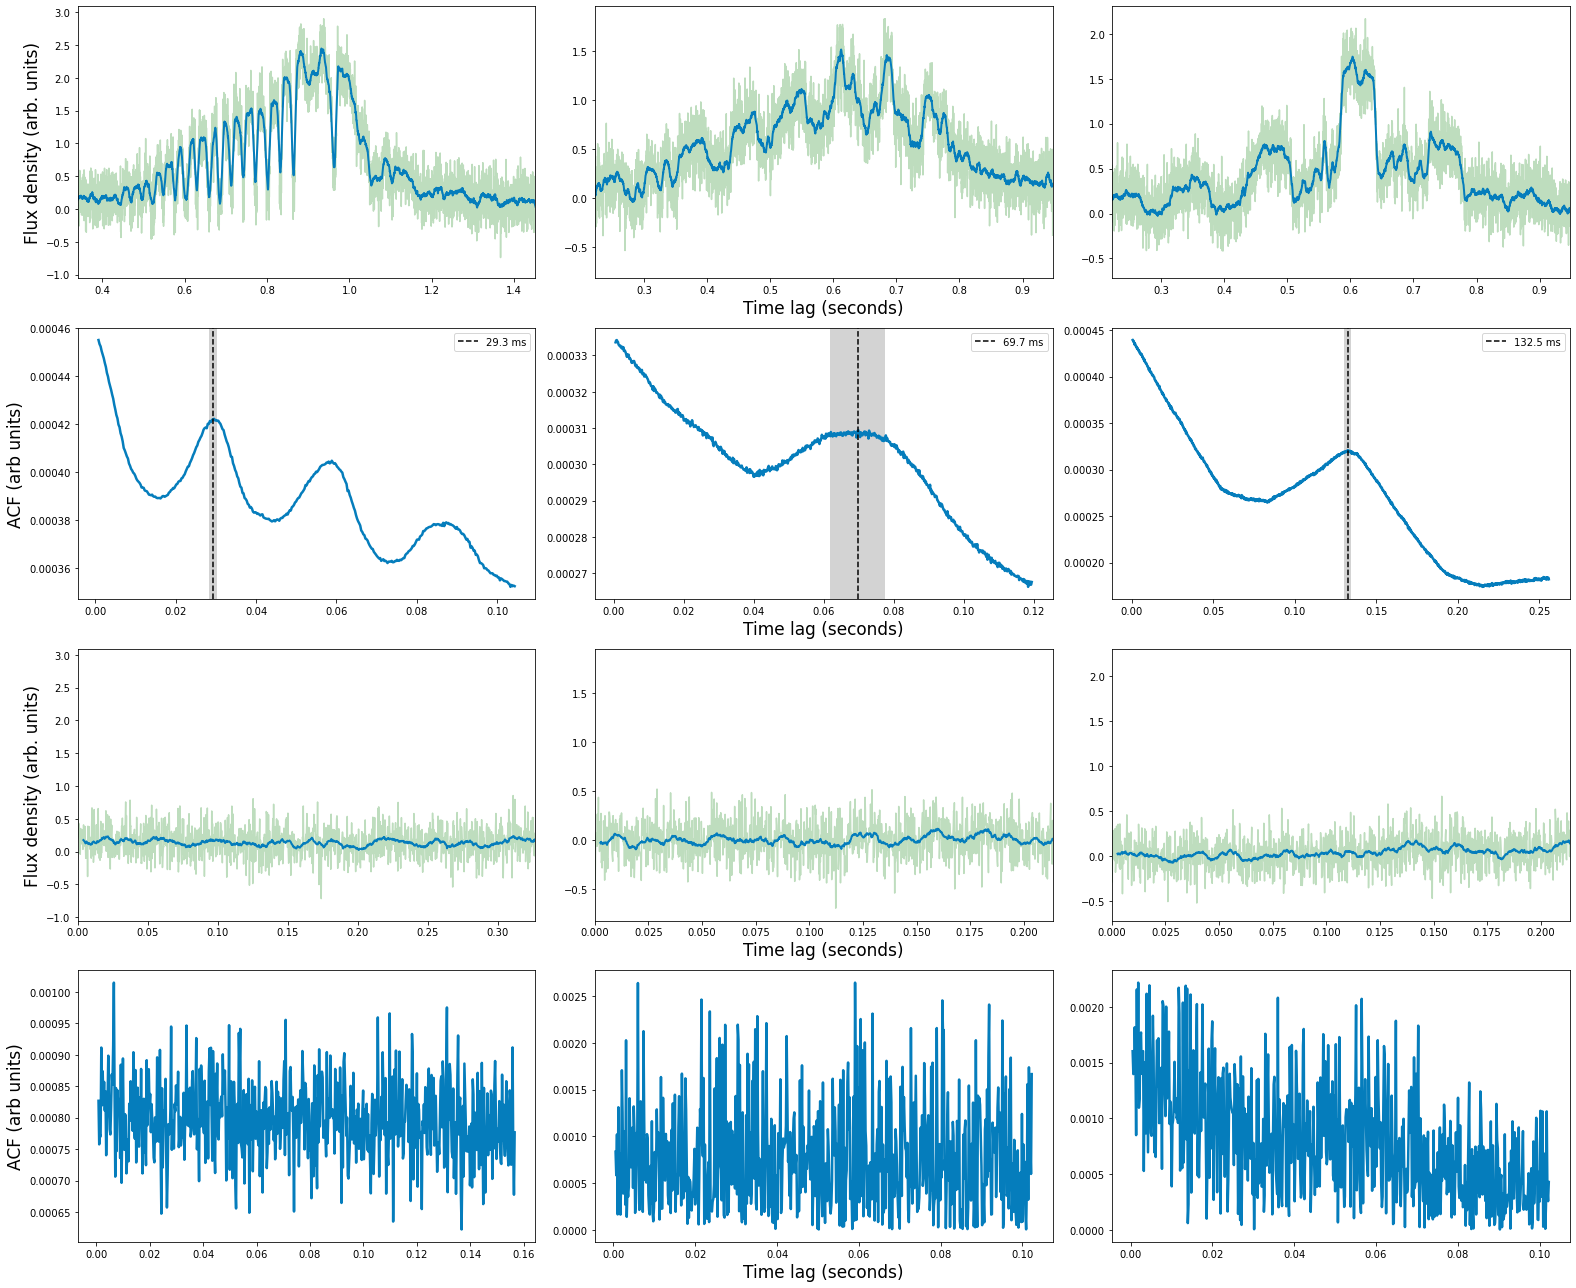

In [6]:
fig = plt.figure(figsize=(22,18))

fs = 17
    
for n in range(3):

    # On-pulse time series
    ax = plt.subplot(4, 3, n + 1)
    
    plot_pulse(pulses[n], onbin_start, onbin_end, tsamp[n])   
    if(n + 1 == 1):
        plt.ylabel('Flux density (arb. units)', fontsize=fs)
    if(n + 1 == 2):
        plt.xlabel('Time lag (seconds)', fontsize=fs)
    
    # On-pulse ACFs
    ax = plt.subplot(4, 3, n + 4)
    
    plot_ACF(pulses[n], onbin_start, onbin_end, tsamp[n], on_acf_startidx[n], on_acf_endidx[n])
    plt.axvline(peaks[n], color='k', ls='--', label=str(np.round(peaks[n]*1e3, decimals=1))+" ms")
    plt.axvspan(peaks[n]-error[n], peaks[n]+error[n], facecolor='lightgray')
    plt.legend()
    if(n + 4 == 4):
        plt.ylabel('ACF (arb units)', fontsize=fs)
    if(n + 4 == 5):
        plt.xlabel('Time lag (seconds)', fontsize=fs)
    

    # Off-pulse time series
    ax = plt.subplot(4, 3, n + 7)
    
    plot_pulse(pulses[n], offbin_start, offbin_end, tsamp[n])
    if(n + 7 == 7):
        plt.ylabel('Flux density (arb. units)', fontsize=fs)
    if(n + 7 == 8):
        plt.xlabel('Time lag (seconds)', fontsize=fs)
    
    
    # Off-pulse ACFs
    ax = plt.subplot(4, 3, n + 10)
    
    plot_ACF(pulses[n], offbin_start, offbin_end, tsamp[n], off_acf_startidx, off_acf_endidx)
    if(n + 10 == 10):
        plt.ylabel('ACF (arb units)', fontsize=fs)
    if(n + 10 == 11):
        plt.xlabel('Time lag (seconds)', fontsize=fs)
        
plt.tight_layout()

plt.savefig('Paper_On-off_ACFs.pdf')

# Plot of multi-quasiperiod pulse example (Extended Data Figure 3)

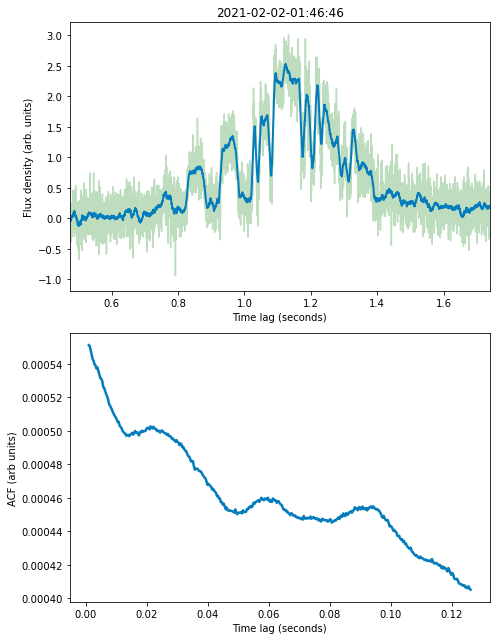

In [7]:
fig = plt.figure(figsize=(7,9))

plt.subplot(211)
plot_pulse('2021-02-02-01:46:46.F.txt', 1500, 5500, 0.0003160267023)
plt.ylabel('Flux density (arb. units)')
plt.xlabel('Time lag (seconds)')
plt.title('2021-02-02-01:46:46')

plt.subplot(212)
plot_ACF('2021-02-02-01:46:46.F.txt', 1500, 5500, 0.0003160267023, 3, 400)
plt.ylabel('ACF (arb units)')
plt.xlabel('Time lag (seconds)')

plt.tight_layout()